In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde

In [156]:
df = pd.read_csv('df_renamed.csv', index_col='datetime', parse_dates=True, dayfirst=True)

In [157]:
pd.set_option('display.max_rows', None)

In [159]:
df.head()

,count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,date,year,month,day,hour
datetime,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017,12,1,0
2017-12-01 01:00:00,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017,12,1,1
2017-12-01 02:00:00,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017,12,1,2
2017-12-01 03:00:00,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017,12,1,3
2017-12-01 04:00:00,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017,12,1,4


### Check missing values

In [160]:
df.isnull().sum()

count              0
temp               0
humidity           0
wind_speed         0
visibility         0
dew_point_temp     0
solar_radiation    0
rainfall           0
snowfall           0
seasons            0
holiday            0
functioning_day    0
date               0
year               0
month              0
day                0
hour               0
dtype: int64

### Check distributions of numeric variables

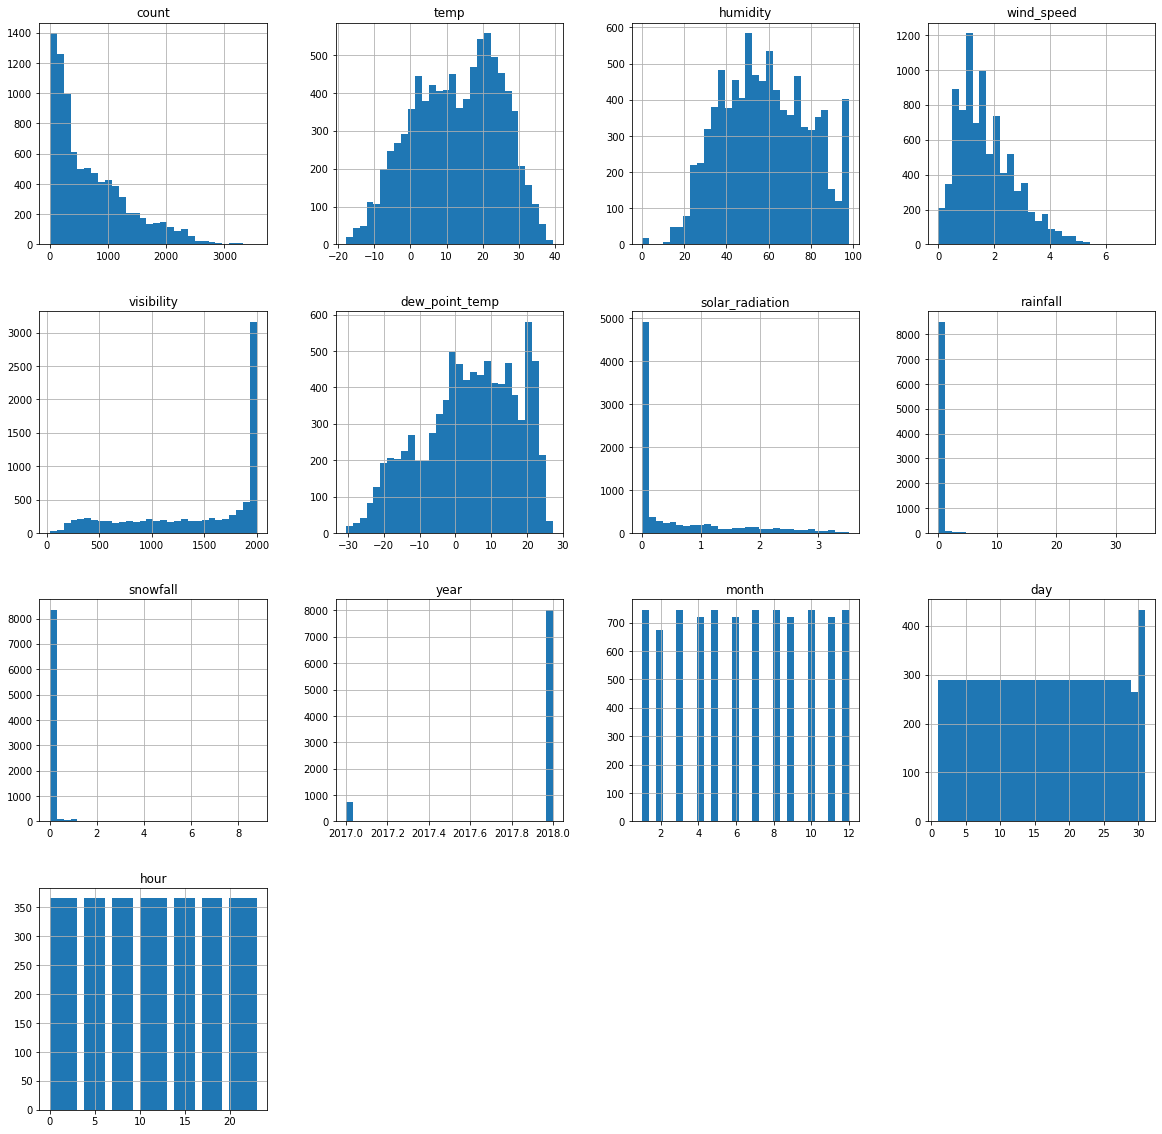

In [161]:
df.hist(bins=30, figsize=[20,20])
plt.show()

In [162]:
df.describe()

,count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,year,month,day,hour
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2017.915068,6.526027,15.720548,11.500000
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.278796,3.448048,8.796749,6.922582
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018.000000,4.000000,8.000000,5.750000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018.000000,7.000000,16.000000,11.500000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018.000000,10.000000,23.000000,17.250000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018.000000,12.000000,31.000000,23.000000


### Check the categorical variables

In [163]:
# "seasons"
df['seasons'].value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: seasons, dtype: int64

In [164]:
# "holiady"
df['holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64

In [165]:
# "functioning_day"
df['functioning_day'].value_counts()

Yes    8465
No      295
Name: functioning_day, dtype: int64

### Check linear relationships between predictors and target

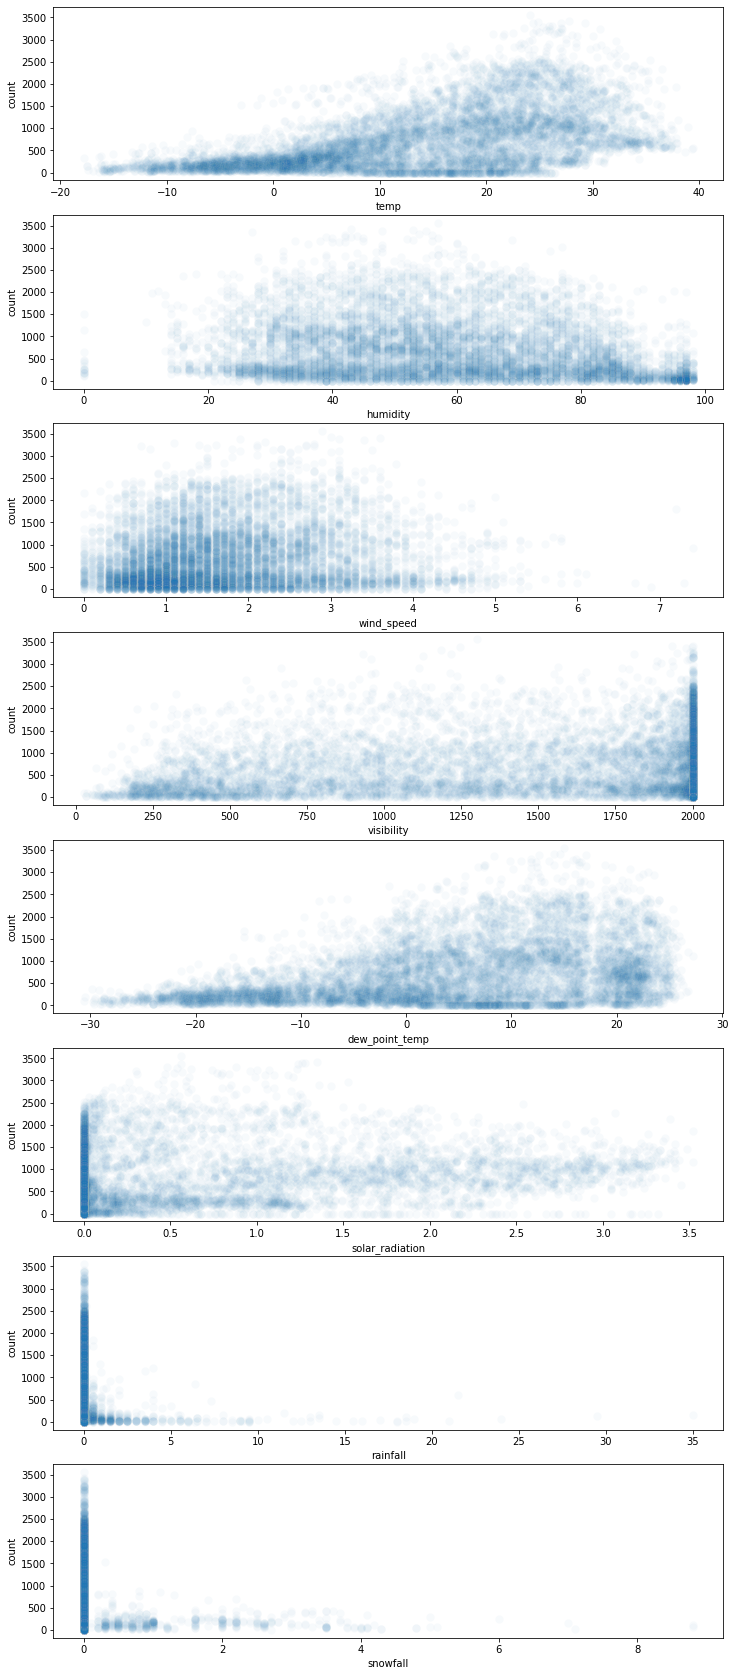

In [166]:
# check linear relationship between numeric variables and "price"
plt.figure(figsize=[12,30])
plt.subplot(811)
sns.scatterplot(data=df, x='temp', y='count', s=70, alpha=0.03)
plt.subplot(812)
sns.scatterplot(data=df, x='humidity', y='count', s=70, alpha=0.03)
plt.subplot(813)
sns.scatterplot(data=df, x='wind_speed', y='count', s=70, alpha=0.03)
plt.subplot(814)
sns.scatterplot(data=df, x='visibility', y='count', s=70, alpha=0.03)
plt.subplot(815)
sns.scatterplot(data=df, x='dew_point_temp', y='count', s=70, alpha=0.03)
plt.subplot(816)
sns.scatterplot(data=df, x='solar_radiation', y='count', s=70, alpha=0.03)
plt.subplot(817)
sns.scatterplot(data=df, x='rainfall', y='count', s=70, alpha=0.03)
plt.subplot(818)
sns.scatterplot(data=df, x='snowfall', y='count', s=70, alpha=0.03)

### Check relationships between categorical predictors and target

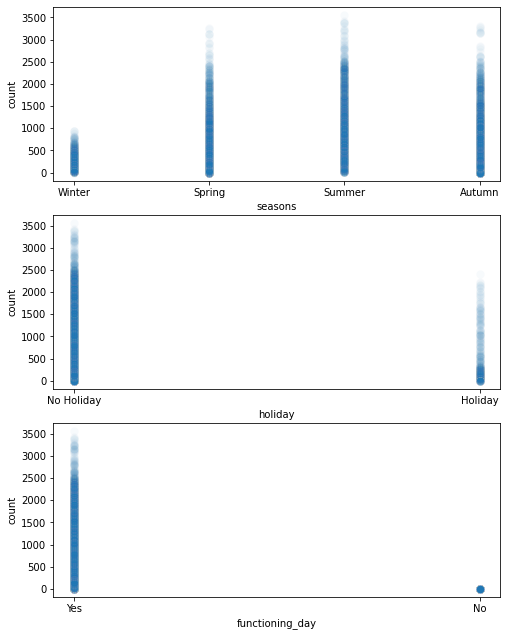

In [169]:
# Check relationships between "seasons", "holiday", and "functioning_day" and target
plt.figure(figsize=[8,30])
plt.subplot(811)
sns.scatterplot(data=df, x='seasons', y='count', s=70, alpha=0.03)
plt.subplot(812)
sns.scatterplot(data=df, x='holiday', y='count', s=70, alpha=0.03)
plt.subplot(813)
sns.scatterplot(data=df, x='functioning_day', y='count', s=70, alpha=0.03)

### Check time series

##### (During  the entire timespan recorded)

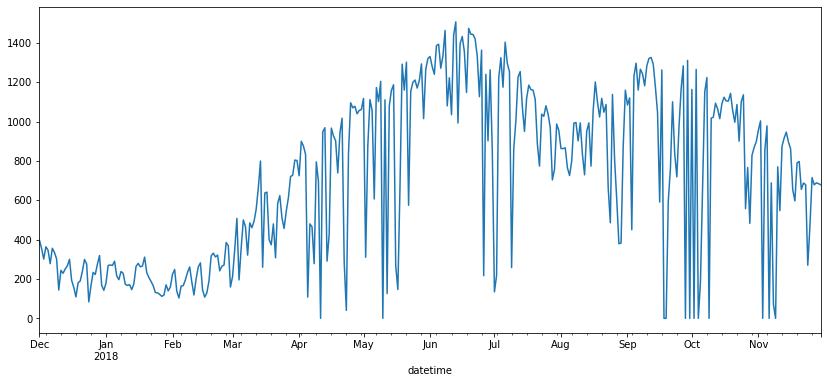

In [170]:
# daily mean count value over the entire timespan
df['count'].resample(rule='D').mean().plot(figsize=(14,6));

# very few data in 2017

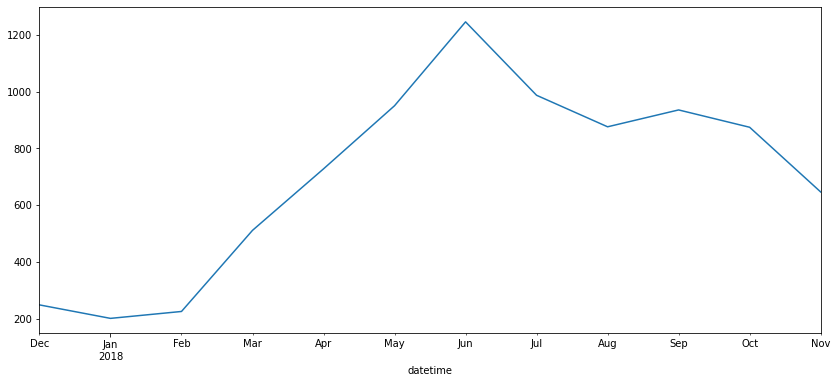

In [171]:
# monthly mean count value over the entire timespan
df['count'].resample(rule='M').mean().plot(figsize=(14,6));

# business took off in the first half of 2018

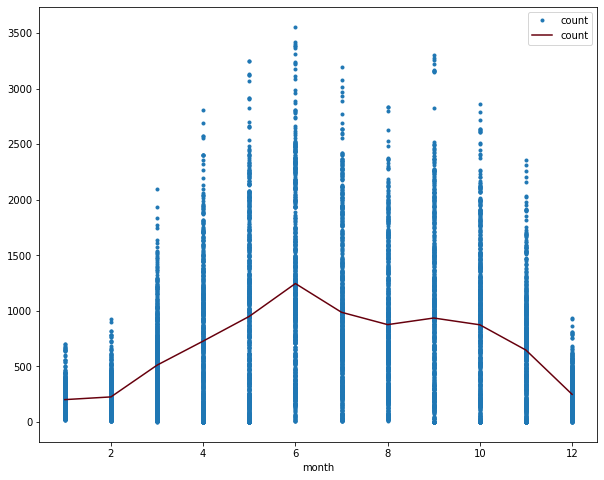

In [172]:
# monthly mean
df.plot(x= 'month', y='count', style='.', figsize = (10, 8))
df.groupby('month')['count'].agg('mean').plot(legend=True, colormap='Reds_r')

# peaks in early summer and early fall

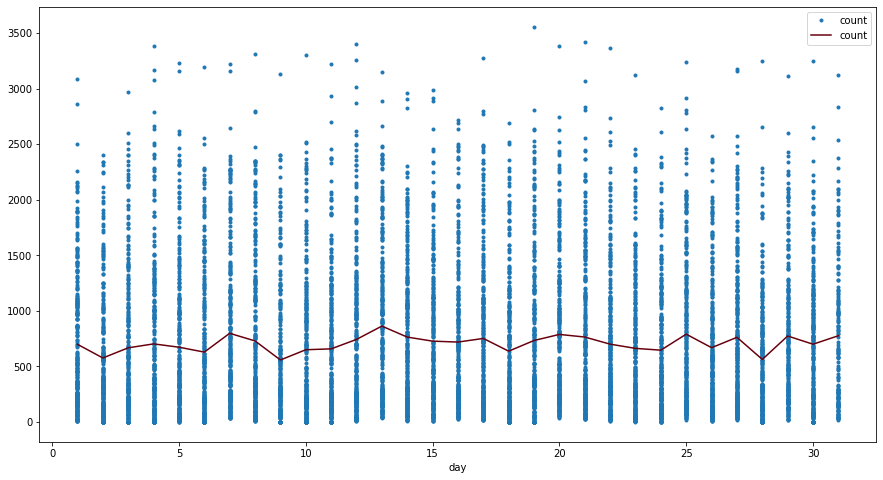

In [173]:
# daily mena
df.plot(x= 'day', y='count', style='.', figsize = (15, 8))
df.groupby('day')['count'].agg('mean').plot(legend=True, colormap='Reds_r')

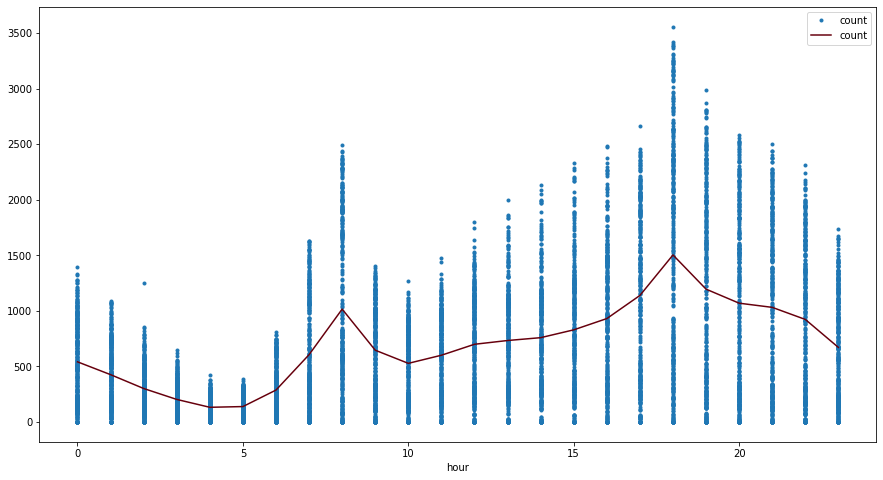

In [174]:
# hourly mean
df.plot(x= 'hour', y='count', style='.', figsize = (15, 8))
df.groupby('hour')['count'].agg('mean').plot(legend=True, colormap='Reds_r')

# 2 peaks: 8am and 6pm

### Check predictors with target in time series

Text(0, 0.5, 'temp')

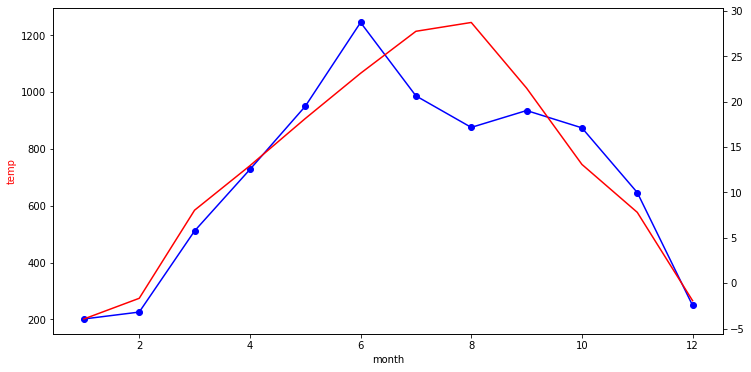

In [175]:
# monthly variation vs.temp
fig, ax = plt.subplots()

ax1 = df.groupby('month')['count'].mean().plot(figsize=(12,6), color='blue', marker='o')
ax.set_ylabel("count", color='blue')
ax2 = ax.twinx()
ax2 = df.groupby('month')['temp'].mean().plot(figsize=(12,6), color='red')
ax.set_ylabel('temp', color='red')

Text(0, 0.5, 'humidity')

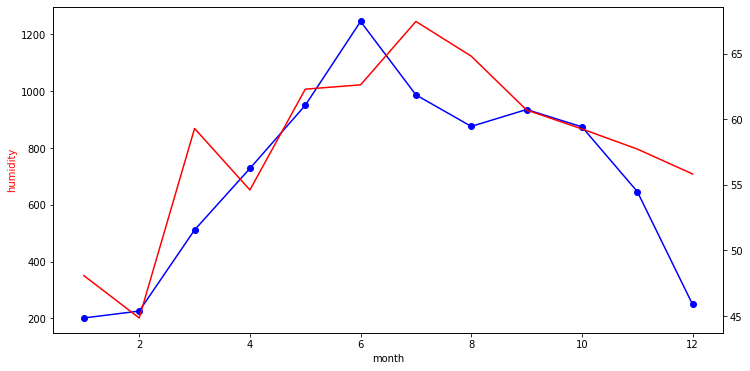

In [176]:
# monthly variaton vs. humidity
fig, ax = plt.subplots()

ax1 = df.groupby('month')['count'].mean().plot(figsize=(12,6), color='blue', marker='o')
ax.set_ylabel("count", color='blue')
ax2 = ax.twinx()
ax2 = df.groupby('month')['humidity'].mean().plot(figsize=(12,6), color='red')
ax.set_ylabel('humidity', color='red')